# I] Import and options


In [56]:
import pandas, numpy, seaborn, scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# have text as text and not curve in .svg
matplotlib.rcParams['svg.fonttype'] = 'none'
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':24, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

In [57]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [123]:
path = input_file_directory + "mefs/mefs_if/MEFs_if.csv" #download
df = pandas.read_csv(path, sep = ";")
df = df.apply(lambda x: x.str.replace(',','.')) #replace coma to dot
df = df.dropna(axis=0) #drop na

df['sampl_cond'] = df[['samples', 'condition']].agg('_'.join, axis=1) #pull two columns
df = df.iloc[:,2:] #select columns
df

,22-23 June,25 July,29 July,sampl_cond
0,1,1,1,W1_normal
1,0.747007341,1.165293122,1.058339648,W1_baf
2,0.695899245,1.2331259,1.357184954,VSR1_normal
3,0.545407657,1.293,1.246785847,VSR1_baf
5,1,1,1,MEF_normal
6,0.758094212,1.013874616,1.032857841,MEF_baf
7,1.041526277,1.312706481,1.532592586,EV_normal
8,1.20249981,1.145873135,1.497473769,EV_baf


In [105]:
df_iso1 = df.iloc[:4,:]
df_ctl = df.iloc[4:,:]
df_iso1

,22-23 June,25 July,29 July,sampl_cond
0,1,1,1,W1_normal
1,0.747007341,1.165293122,1.058339648,W1_baf
2,0.695899245,1.2331259,1.357184954,VSR1_normal
3,0.545407657,1.293,1.246785847,VSR1_baf


In [160]:
Data

,22-23 June,25 July,29 July,sampl_cond
0,1,1,1,MEF_normal
1,0.758094212,1.013874616,1.032857841,MEF_baf
2,1.041526277,1.312706481,1.532592586,EV_normal
3,1.20249981,1.145873135,1.497473769,EV_baf


In [180]:
a = str(Data.iloc[0, 3:4])
print(a)

sampl_cond    W1_normal
Name: 0, dtype: object


In [181]:
Data.loc[0]['sampl_cond']

'W1_normal'

the pvalue between W1_normal and VSR1_normal is 3.214E-01
the pvalue between W1_baf and VSR1_baf is 3.313E-01


WITHOUT ATG7
the pvalue between MEF_normal and EV_normal is 3.180E-02
the pvalue between MEF_baf and EV_baf is 4.043E-02
WITHOUT VSR
the pvalue between W1_normal and VSR1_normal is 3.214E-01
the pvalue between W1_baf and VSR1_baf is 3.313E-01


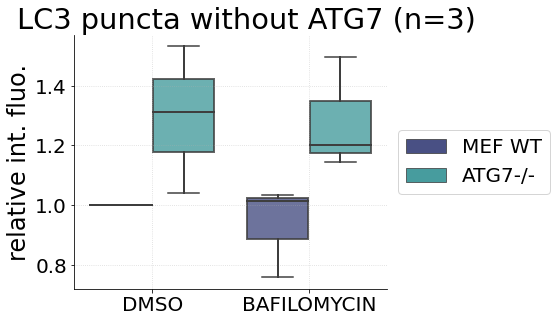

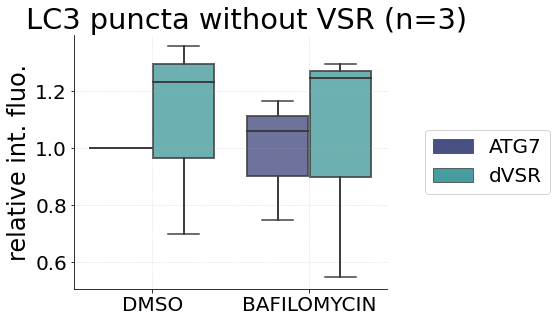

In [187]:
# Distribution: Data preparation + graph
dfs = [df_ctl, df_iso1]
infos = ['without ATG7', 'without VSR']
for i in range(len(dfs)) :
    Data = dfs[i]
    Info = infos[i]
    
    # Mann-Whitney analysis 
    print(Info.upper())
    ##Control
    statistic, pvalue = scipy.stats.mannwhitneyu(Data.iloc[0, :3], Data.iloc[2, :3])
    Pvalue = "{:.3E}".format(pvalue)
    print("the pvalue between", Data.loc[0]['sampl_cond'], "and", Data.loc[2]['sampl_cond'],"is", Pvalue)
    ##Iso 1 vs dVSR
    statistic, pvalue = scipy.stats.mannwhitneyu(Data.iloc[1, :3], Data.iloc[3, :3])
    Pvalue = "{:.3E}".format(pvalue)
    print("the pvalue between", Data.loc[1]['sampl_cond'], "and", Data.loc[3]['sampl_cond'],"is", Pvalue)   
    
    Data.reset_index(inplace = True, drop = True)
    shape = Data.shape
    shape = shape[0]
#     print(shape)

    #select the sample type column
    sample_type = {'sampl_cond':[Data.iloc[:,3][i]
                                 for i in range(0, shape)]}

    #convert to df, and copy it 3 times
    sample_typedf = pandas.DataFrame(sample_type)
    sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf])
    sample_typedf.reset_index(drop=True, inplace=True)

    # Y for expression value 
    y = {'y':[Data.iloc[:,j][i]
      for j in range(0,3)
        for i in range(0, shape)]}

    #create df with Y 
    data_distrib = pandas.DataFrame(y)
    data_distrib['y'] = data_distrib['y'].astype(float)
    
    #add x
    cond = 'DMSO', 'BAFILOMYCIN'
    data_distrib['x'] = cond*6
    data_distrib

    # Will be used for Hue
    data_distrib['sampl_cond'] = sample_typedf['sampl_cond']
    # + rename and split
    data_distrib['sampl_cond'] = data_distrib['sampl_cond'].str.split('_', expand=True)
    data_distrib = data_distrib.replace({'sampl_cond' : {'MEF':'MEF WT',
                                                     'EV':'ATG7-/-',
                                                     'W1':'ATG7',
                                                     'VSR1':'dVSR'}})
    
    #graph
    seaborn.catplot(x="x", y="y", hue="sampl_cond", aspect= 1.2, kind="box", palette = 'mako',
                    data = data_distrib, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                    showcaps=True, showfliers=False, legend=False)

    plt.grid(alpha = 0.5, ls=':')
    plt.ylabel('relative int. fluo.')
    plt.xlabel('')
    plt.title('LC3 puncta '+ Info + ' (n=3)', x=.55)
    plt.tight_layout()
    plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.5))
